# Covid-19 in India: An analysis of geographical and monthly trends

## Objective

I went to New Delhi, India as a summer intern in July 2021, working to poll government schools on students' health habits. I want to use the data from this dataset to determine how theoretically safe it was for me to have visited Delhi during that time. This project also aims to show geographical and monthly analysis of Covid-19 in India, perhaps helping future Indian healthcare and pharmaceutical companies combat future viruses and their variants. 

## Setup

#### Importing Necessary Libraries

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from prophet import Prophet

#### Reading in the data

In [55]:
df = pd.read_csv(r'C:\Users\ankit\Data Project COVID 19 INDIA\covid_19_data.csv\covid_19_data.csv')

#### Filtering Data for India and Looking at the Data

In [56]:
df_india = df[df['Country/Region'] == 'India']
df_india.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
446,447,01/30/2020,NaN,India,1/30/20 16:00,1.0,0.0,0.0
509,510,01/31/2020,NaN,India,1/31/2020 23:59,1.0,0.0,0.0
567,568,02/01/2020,NaN,India,1/31/2020 8:15,1.0,0.0,0.0
629,630,02/02/2020,NaN,India,2020-02-02T06:03:08,2.0,0.0,0.0
696,697,02/03/2020,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0


## Data Cleaning

#### Check for Incomplete Data

In [57]:
for col in df_india.columns:
    percent_missing = np.mean(df_india[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing*100)))

SNo - 0%
ObservationDate - 0%
Province/State - 1%
Country/Region - 0%
Last Update - 0%
Confirmed - 0%
Deaths - 0%
Recovered - 0%


#### Remove Null Values and Drop Duplicates

In [58]:
df_india = df_india.dropna()
df_india.drop_duplicates()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
39260,39261,06/10/2020,Andaman and Nicobar Islands,India,2021-04-02 15:13:53,33.0,0.0,33.0
39261,39262,06/10/2020,Andhra Pradesh,India,2021-04-02 15:13:53,5070.0,77.0,2802.0
39277,39278,06/10/2020,Arunachal Pradesh,India,2021-04-02 15:13:53,57.0,0.0,1.0
39278,39279,06/10/2020,Assam,India,2021-04-02 15:13:53,2937.0,4.0,1085.0
39300,39301,06/10/2020,Bihar,India,2021-04-02 15:13:53,5459.0,32.0,2864.0
...,...,...,...,...,...,...,...,...
306351,306352,05/29/2021,Tripura,India,2021-05-30 04:20:55,50739.0,507.0,43190.0
306366,306367,05/29/2021,Unknown,India,2021-05-30 04:20:55,0.0,0.0,0.0
306377,306378,05/29/2021,Uttar Pradesh,India,2021-05-30 04:20:55,1688152.0,20208.0,1621743.0
306378,306379,05/29/2021,Uttarakhand,India,2021-05-30 04:20:55,327112.0,6360.0,289642.0


#### Checking Column Data Types 

In [59]:
print(df_india.dtypes)

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


#### Setting 'ObservationDate' to datetime format

In [60]:
df_india['ObservationDate'] = pd.to_datetime(df_india['ObservationDate'])
print(df_india.dtypes)

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object


## Data Exploration

In my analysis, I explored the data, figuring out monthly trends for confirmed Covid-19 cases, Covid-19 recoveries, and Covid-19 deaths across all states in India. I then broke down results by state, and attempted to forecast the next 100 days in Delhi and, more broadly, India as a whole. Finally, I determined how much my forecast deviated from reality and why that could be. 

#### Data Aggregation

I summed the three columns, 'Confirmed', 'Deaths', and 'Recovered' to get a broader picture of total Covid-19 cases across India separated by month

In [61]:
# Aggregate the data by date, summing up the counts
df_aggregated = df_india.groupby('ObservationDate').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()

#### Plotting Aggregated Data

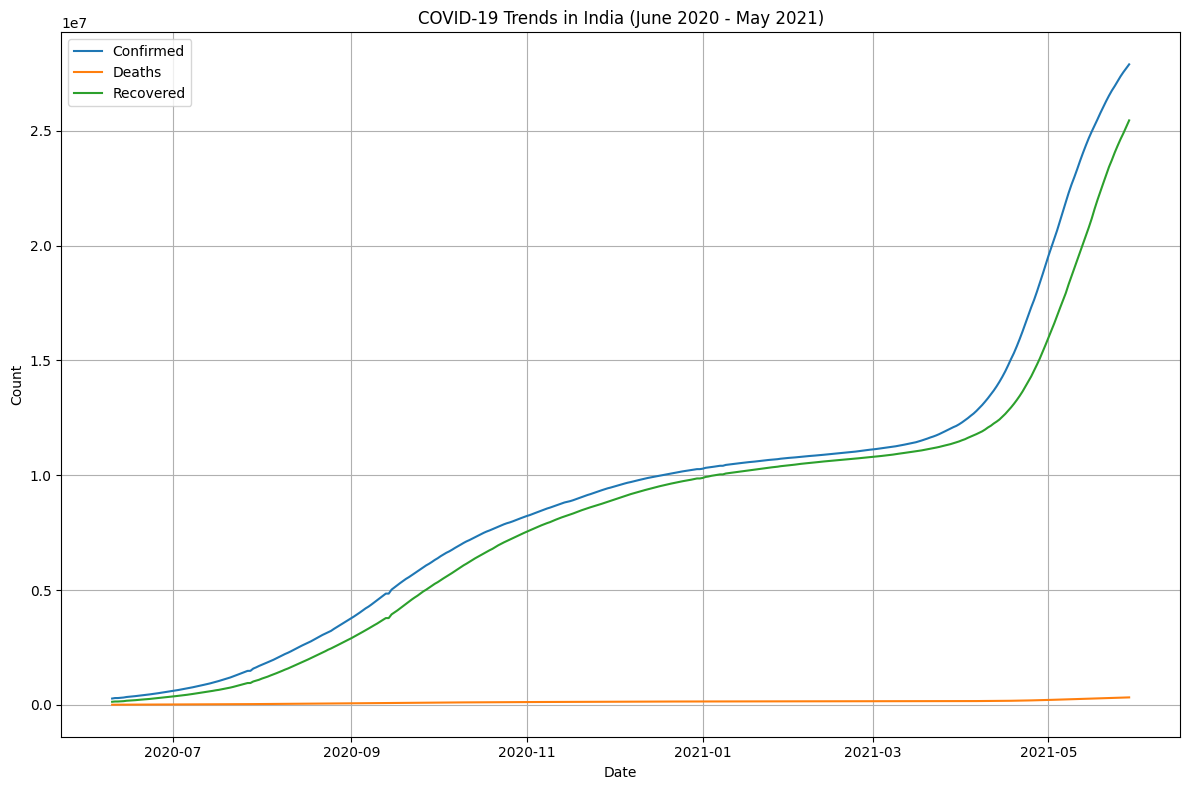

In [62]:
plt.figure(figsize=(12, 8))

# Creating line plot to show data
sns.lineplot(x='ObservationDate', y='Confirmed', data=df_aggregated, label='Confirmed')
sns.lineplot(x='ObservationDate', y='Deaths', data=df_aggregated, label='Deaths')
sns.lineplot(x='ObservationDate', y='Recovered', data=df_aggregated, label='Recovered')

#Adding title and axes labels
plt.title('COVID-19 Trends in India (June 2020 - May 2021)')
plt.xlabel('Date')
plt.ylabel('Count')

#Adding legend
plt.legend()

#Fixing layout
plt.grid(True)
plt.tight_layout()
plt.show()

**Conclusion:** There seems to be a small uptick in Covid-19 cases around October 2020, with a massive uptick in cases around late April 2021, totalling upwards of 25 million cases just past May 2021. Also of note is that most people who are confirmed to have Covid-19 in India eventually do recover from the virus, since the 'Recovered' line closely mirrors the 'Confirmed' line. However, one issue to note is that the 'Death' line seems to be a straight line since its scale is too small compared to our other columns. 

#### Plotting 'Deaths' Separately

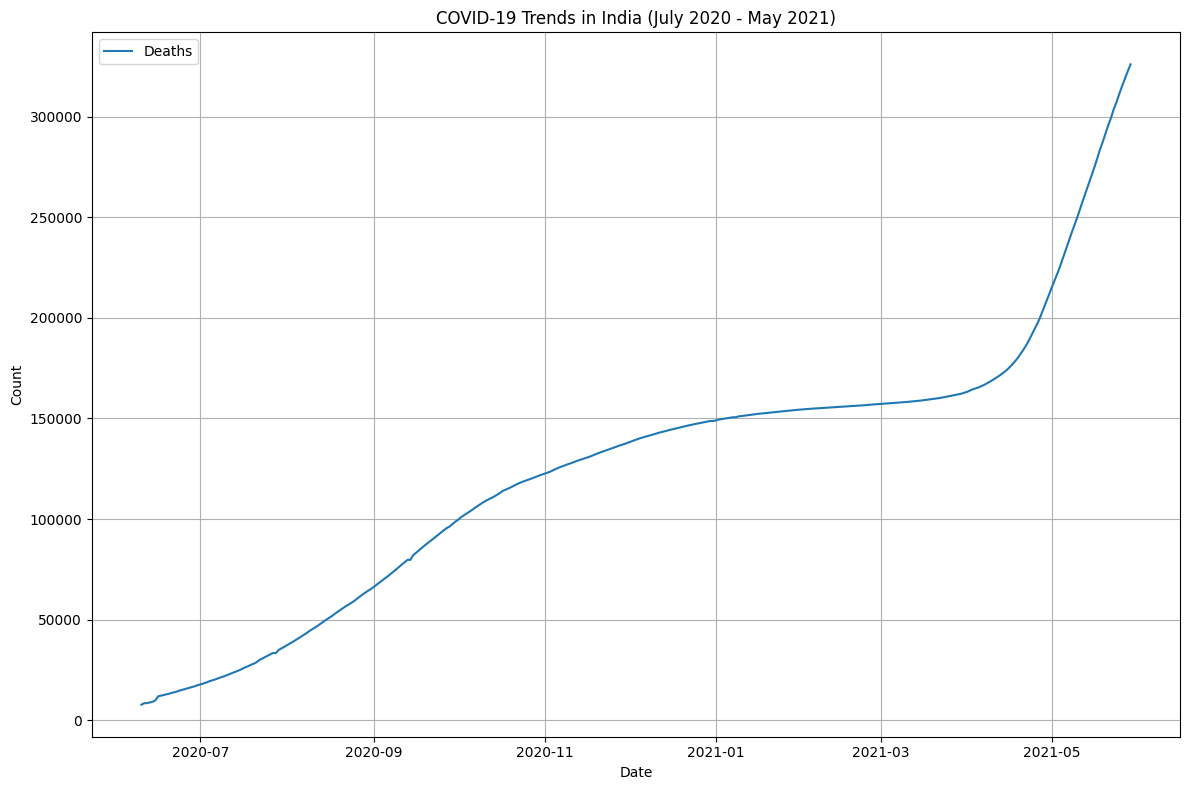

In [63]:
plt.figure(figsize=(12, 8))

# Creating line plot to only show death data
sns.lineplot(x='ObservationDate', y='Deaths', data=df_aggregated, label='Deaths')

#Adding title and axes labels
plt.title('COVID-19 Trends in India (July 2020 - May 2021)')
plt.xlabel('Date')
plt.ylabel('Count')

#Creating Legend
plt.legend()

#Fixing layout
plt.tight_layout()
plt.grid(True)
plt.show()

**Observation:** We can see the 'Deaths' line more clearly now, showing an aggregate death count of over 300,000 people by the end of May 2021. 

#### Plotting Confirmed Cases by Indian State

Now, I would like to plot the aggregated data by state, visualizing which states were hit most severely by Covid-19.

#### Plotting Total State Data

In [ ]:
plt.figure(figsize=(12, 8))
plt.bar(df_india['Province/State'], df_india['Confirmed'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Confirmed Cases')
plt.title('Total Confirmed Cases by State in India')
plt.xticks(rotation=45, ha='right')
plt.show()

**Conclusion:** This data shows us that the most affected states were Maharashtra, Karnataka, and Kerala to name a few. The next steps to analyze more data could be showing the percentage of the population per state that was affected by Covid-19, but that is outside the scope of this dataset analysis.

#### Forecasting Future Covid-19 Data Past May 2021

Given that I actually went to Delhi in July 2021, I want to forecast the trends in Covid-19 cases using this dataset that ends May 2021. My goal is to see if I could have better informed myself of Covid-19 safety before going by forecasting future monthly trends at the time. 

In [ ]:
#Creating a dataframe using aggregate sum data by month
df_forecast = df_india.groupby('ObservationDate')['Confirmed'].sum().reset_index()
df_forecast.columns = ['ds', 'y']

# Initialize the Prophet model
model = Prophet()

# Fit the model with the data
model.fit(df_forecast)

# Create a DataFrame with 100 future dates for prediction
future = model.make_future_dataframe(periods=100)  

# Generate predictions for the future dates
forecast = model.predict(future)

# Plot the forecast with uncertainty
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(df_forecast['ds'], df_forecast['y'], label='Actual', color='blue')
ax.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='lightcoral', alpha=0.2)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('COVID-19 Forecast for Confirmed Cases in India')

# Display legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

**Conclusion:** The forecast predicts a continuous spike upwards of Covid-19 cases with seemingly no end. Since this is an elementary forecasting model, we do not expect it to be perfect, just giving us a general guideline of future Covid-19 trends. Now, we should check if these broader trends hold true at a smaller scale, repeating these visualizations on just Delhi.

#### Plotting Confirmed Cases In Delhi

In [ ]:
#Create a new dataframe filtering for Delhi
df_delhi = df_india[df_india['Province/State'] == 'Delhi']

# Plot the line graph for Delhi's confirmed cases
plt.figure(figsize=(12, 8))  # Adjust the size as needed
plt.plot(df_delhi['ObservationDate'], df_delhi['Confirmed'], marker='o', color='b')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('COVID-19 Confirmed Cases in Delhi')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

**Observation:** The visualization looks almost identical to India as a whole, just on a smaller scale. There seem to be minor fluctuations in late 2020, and one major difference being that the number of confirmed Covid-19 cases seems to taper off around June 2021. 

#### Forecasting Future Covid-19 Data for Delhi. How safe was it to go to Delhi in July 2021?

In [ ]:
# Creating a forecast dataframe for Delhi
df_forecast_delhi = df_delhi.groupby('ObservationDate')['Confirmed'].sum().reset_index()
df_forecast_delhi.columns = ['ds', 'y']

# Initialize the Prophet model
model_delhi = Prophet()

# Fit the model with the data
model_delhi.fit(df_forecast_delhi)

# Create a DataFrame with future dates for prediction
future_delhi = model_delhi.make_future_dataframe(periods=100)  # Assuming you want to predict the next 100 days

# Generate predictions for the future dates
forecast_delhi = model_delhi.predict(future_delhi)

# Plot the forecast
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(df_forecast_delhi['ds'], df_forecast_delhi['y'], label='Actual', color='blue')
ax.plot(forecast_delhi['ds'], forecast_delhi['yhat'], label='Forecast', color='red')
ax.fill_between(forecast_delhi['ds'], forecast_delhi['yhat_lower'], forecast_delhi['yhat_upper'], color='lightcoral', alpha=0.2)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('COVID-19 Forecast for Confirmed Cases in Delhi')
# Display legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

**Conclusion:** As we can see from the Delhi Forecast, the predicted increase in Covid-19 cases is almost identical in slope to the forecast for India as a whole. Even the minor sudden plateau in June 2021 does not seem to significantly change the slope of the forecast line, which indicates that Covid-19 cases will drastically increase in Delhi. 

## Final Conclusion and Comparison to Reality

The conclusion from my data is that there will be a continual increase in Covid-19 cases throughout all of India in the latter half of 2021. Thus, if I were to strictly base my decisions off of this conclusion, I should not have gone to Delhi in July 2021. However, in reality, Covid-19 would taper off significantly right around late May 2021 and not show a significant resurgence until February 2022. I knew this at the time of leaving (around late June 2021), making it much safer than normal to travel to India and participate in my summer internship. 

There are a few potential reasons why the future trends in the dataset do not match up to what actually happened in reality. First of all, the data does not account for outside factors such as percentage of population vaccinated, herd immunity status, public mask usage, public awareness and government reform, ease of access to hospitals/vaccinations/Covid-19 tests, and even general unpredictability of viruses and their variants. All of these factors could have significant impact on the waxing and waning of Covid-19 cases throughout India. Only with more data and a more robust forecasting model could the future trends potentially match what actually happened in reality. 